Import Libraries

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt
from matplotlib.ticker import MaxNLocator

# Importing the libraries to train the model
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

# Importing the metrics libraries
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report

Read the data set

In [271]:
#fifa_dataset = pd.read_csv('/Users/kasunikaushalya/Desktop/AI Programming/international_matches.csv', parse_dates = ['date'])
fifa_dataset = pd.read_csv('/Users/kasunikaushalya/Desktop/AI Programming/international_matches.csv')
fifa_dataset.tail(4)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


Check data set size

In [272]:
fifa_dataset.shape

(23921, 25)

Looking for data set briefly

In [273]:
fifa_dataset.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
fifa_dataset.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


Show all column names

In [275]:
fifa_dataset.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

Transformie object "date" column to datetime

In [276]:
fifa_dataset['date'] = pd.to_datetime(fifa_dataset['date'])

Column names with column type

In [277]:
fifa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

Check null values

In [278]:
fifa_dataset.isnull().sum().sort_values(ascending=False)

away_team_mean_defense_score     16357
home_team_mean_defense_score     16134
away_team_mean_midfield_score    15942
away_team_goalkeeper_score       15826
home_team_mean_midfield_score    15759
away_team_mean_offense_score     15609
home_team_goalkeeper_score       15542
home_team_mean_offense_score     15411
country                              0
home_team_result                     0
shoot_out                            0
neutral_location                     0
date                                 0
home_team                            0
tournament                           0
away_team_score                      0
home_team_score                      0
away_team_total_fifa_points          0
home_team_total_fifa_points          0
away_team_fifa_rank                  0
home_team_fifa_rank                  0
away_team_continent                  0
home_team_continent                  0
away_team                            0
city                                 0
dtype: int64

Drop unrequired columns

In [280]:
cleaned_column_dataset = fifa_dataset.drop(['home_team','home_team_continent', 'away_team_continent'], axis=1)
#cleaned_column_dataset = fifa_dataset.drop(['home_team','home_team_continent', 'away_team_continent', 'home_team_mean_midfield_score','home_team_fifa_rank','home_team_mean_offense_score','home_team_mean_defense_score','home_team_score', 'home_team_total_fifa_points','away_team_total_fifa_points', 'city','country','neutral_location', 'shoot_out','home_team_goalkeeper_score','away_team_goalkeeper_score'], axis=1)

df = pd.DataFrame(cleaned_column_dataset)

check new dataset columns

In [281]:
cleaned_column_dataset.columns

Index(['date', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

Check new dataset size after droppping columns

In [282]:
cleaned_column_dataset.shape

(23921, 22)

Filtering teams participating only in the World Cup, whether qualifying matches or cup matches

In [284]:
df_fifaWcupTeams = df[df['tournament'].str.contains('FIFA World')]

check new dataset size which is only inclued "FIFA World Cup" and qualifying matches or cup matches

In [285]:
df_fifaWcupTeams.shape

(5960, 22)

Display new dataset

In [286]:
df_fifaWcupTeams.tail(4)

,date,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23654,2022-06-01,Ukraine,39,27,1472,1535,1,3,FIFA World Cup qualification,Glasgow,...,No,Lose,77.0,75.0,79.2,74.0,77.5,74.8,78.7,80.0
23723,2022-06-05,Ukraine,18,27,1588,1535,1,0,FIFA World Cup qualification,Cardiff,...,No,Win,74.0,75.0,75.0,73.0,78.5,74.8,78.7,80.0
23876,2022-06-13,Peru,42,22,1462,1562,0,0,FIFA World Cup qualification,Al Rayyan,...,Yes,Win,77.0,74.0,72.0,72.3,73.5,74.5,73.0,76.8
23890,2022-06-14,New Zealand,31,101,1503,1206,1,0,FIFA World Cup qualification,Al Rayyan,...,No,Win,88.0,68.0,71.5,70.3,69.2,70.2,70.7,69.2


Save new dataset csv file name called "FIFA Teams" into same file location

In [287]:
import pandas as pd

# Save dataframe as csv file in the current folder
df_fifaWcupTeams.to_csv('FIFA Teams.csv', index = False, encoding='utf-8') # False: not include index
print(df_fifaWcupTeams)

            date    away_team  home_team_fifa_rank  away_team_fifa_rank  \
0     1993-08-08      Uruguay                   59                   22   
2     1993-08-08    Venezuela                   35                   94   
4     1993-08-08    Argentina                   67                    5   
5     1993-08-08     Colombia                   70                   19   
10    1993-08-15       Canada                   52                   46   
...          ...          ...                  ...                  ...   
23634 2022-03-30  New Zealand                  142                  111   
23654 2022-06-01      Ukraine                   39                   27   
23723 2022-06-05      Ukraine                   18                   27   
23876 2022-06-13         Peru                   42                   22   
23890 2022-06-14  New Zealand                   31                  101   

       home_team_total_fifa_points  away_team_total_fifa_points  \
0                               

Check new dataset null values

In [288]:
# Do the data have missing/null values?
print("There is", df_fifaWcupTeams.isna().sum().sum(), "missing value.")
print("There is", df_fifaWcupTeams.isnull().sum().sum(), "null value.")

There is 28517 missing value.
There is 28517 null value.


In [289]:
df_fifaWcupTeams.isnull().sum().sort_values(ascending=False)

home_team_mean_defense_score     3672
away_team_mean_defense_score     3671
away_team_mean_midfield_score    3586
home_team_mean_midfield_score    3579
away_team_goalkeeper_score       3538
home_team_goalkeeper_score       3524
away_team_mean_offense_score     3476
home_team_mean_offense_score     3471
away_team                           0
home_team_result                    0
shoot_out                           0
date                                0
country                             0
city                                0
tournament                          0
away_team_score                     0
home_team_score                     0
away_team_total_fifa_points         0
home_team_total_fifa_points         0
away_team_fifa_rank                 0
home_team_fifa_rank                 0
neutral_location                    0
dtype: int64

Looking at the number of each result, we see that most games do not end in a draw.

In [290]:
df_fifaWcupTeams['home_team_result'].value_counts().sort_values(ascending=False)

Win     2988
Lose    1717
Draw    1255
Name: home_team_result, dtype: int64

In this step I will create new features and eliminate others.
Creating a function to change object values to numeric in the  'home_team_result' column.

In [291]:
def transform_resultado(result):
  if result == "Win":
    return 1
  elif result == "Lose":
    return -1
  else:
    return 0
#df_fifaWcupTeams['home_team_result'] = df_fifaWcupTeams['home_team_result'].map(transform_resultado)
df_fifaWcupTeams.loc[:,('home_team_result','home_team_result')]

,home_team_result,home_team_result
0,Win,Win
2,Win,Win
4,Lose,Lose
5,Lose,Lose
10,Win,Win
...,...,...
23634,Lose,Lose
23654,Lose,Lose
23723,Win,Win
23876,Win,Win


 Creating a variable that adds the attack score (midfield + offense) and then adds the defense score (goalkeeper + defense)

In [294]:
# df_fifaWcupTeams['home_attack'] = df_fifaWcupTeams['home_team_mean_midfield_score'] + df_fifaWcupTeams['home_team_mean_offense_score']
# df_fifaWcupTeams['home_defense'] = df_fifaWcupTeams['home_team_goalkeeper_score'] + df_fifaWcupTeams['home_team_mean_defense_score']
# df_fifaWcupTeams['away_attack'] = df_fifaWcupTeams['away_team_mean_midfield_score'] + df_fifaWcupTeams['away_team_mean_offense_score']
# df_fifaWcupTeams['away_defense'] = df_fifaWcupTeams['away_team_goalkeeper_score'] + df_fifaWcupTeams['away_team_mean_defense_score']

df_fifaWcupTeams.loc[:,('home_attack','home_team_mean_midfield_score','home_team_mean_offense_score')] 
df_fifaWcupTeams.loc[:,('home_defense','home_team_goalkeeper_score','home_team_mean_defense_score')] 

df_fifaWcupTeams.loc[:,('away_attack','away_team_mean_midfield_score','away_team_mean_offense_score')]
df_fifaWcupTeams.loc[:,('away_defense','away_team_goalkeeper_score','away_team_mean_defense_score')] 

,away_defense,away_team_goalkeeper_score,away_team_mean_defense_score
0,NaN,NaN,NaN
2,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
10,NaN,NaN,NaN
...,...,...,...
23634,138.2,68.0,70.2
23654,149.8,75.0,74.8
23723,149.8,75.0,74.8
23876,148.5,74.0,74.5


 Creating a variable with the ranking of the home team minus the away team

In [299]:
df_fifaWcupTeams['rank_difference'] = df_fifaWcupTeams['home_team_fifa_rank'] - df_fifaWcupTeams['away_team_fifa_rank']

<ipython-input-299-6bb6529a4e5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifaWcupTeams['rank_difference'] = df_fifaWcupTeams['home_team_fifa_rank'] - df_fifaWcupTeams['away_team_fifa_rank']


Let's delete the columns that are not very important

No matter the city or country, the most important thing is to know if the location is neutral or not
As we only want to know the first stage of the world cup the 'shoot_out' is not important

In [301]:
# df_fifaWcupTeams = df_fifaWcupTeams.drop(['home_team_continent', 'away_team_continent', 'city','country', 
#               'shoot_out', 'home_team_mean_midfield_score', 'home_team_mean_offense_score', 
#               'home_team_goalkeeper_score', 'home_team_mean_defense_score', 
#               'away_team_mean_midfield_score', 'away_team_mean_offense_score', 
#               'away_team_goalkeeper_score',  'away_team_mean_defense_score'], axis=1)

df_fifaWcupTeams = df_fifaWcupTeams.drop(['city','country', 
              'shoot_out', 'home_team_mean_midfield_score', 'home_team_mean_offense_score', 
              'home_team_goalkeeper_score', 'home_team_mean_defense_score', 
              'away_team_mean_midfield_score', 'away_team_mean_offense_score', 
              'away_team_goalkeeper_score',  'away_team_mean_defense_score'], axis=1)

In [302]:
df_fifaWcupTeams.shape

(5960, 16)

In [303]:
df_fifaWcupTeams.columns

Index(['date', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'neutral_location',
       'home_team_result', 'home_attack', 'home_defense', 'away_attack',
       'away_defense', 'rank_difference'],
      dtype='object')

working with world cup data

In [304]:
df_fifaWcupTeams = df_fifaWcupTeams[df_fifaWcupTeams['tournament']== 'FIFA World Cup']

In [306]:
copa_2006 = df_fifaWcupTeams[df_fifaWcupTeams['date'].dt.year ==2006]
copa_2010 = df_fifaWcupTeams[df_fifaWcupTeams['date'].dt.year ==2010]
copa_2014 = df_fifaWcupTeams[df_fifaWcupTeams['date'].dt.year ==2014]
copa_2018 = df_fifaWcupTeams[df_fifaWcupTeams['date'].dt.year ==2018]
copa_2022 = df_fifaWcupTeams[df_fifaWcupTeams['date'].dt.year ==2022]

Selecting only the knockout stage of the world cup because that's what we want to predict.

In [317]:

copa_2006= copa_2006[48:]
copa_2010 = copa_2010[48:]
copa_2014 = copa_2014[48:]
copa_2018 = copa_2018[48:]
copa_2022 = copa_2022[48:]

Split into training, validation and testing.
In this step, we analyze that we had a lot of missing data before 2005, so let's use data starting from 2006 until now (2022).

In [316]:
treino = pd.concat([copa_2006, copa_2010, copa_2014])
valid_1 = copa_2018
teste = copa_2022

 Feature Engineering with Cup data
 Filling in the null variables (these usually from selections with less tradition), with the lowest scores

In [318]:
# Filling in the null variables (these usually from selections with less tradition), with the lowest scores

treino['away_defense'] = treino['away_defense'].fillna(treino['away_defense'].min())
treino['home_defense'] = treino['home_defense'].fillna(treino['home_defense'].min())
treino['home_attack'] = treino['home_attack'].fillna(treino['home_attack'].min())
treino['away_attack'] = treino['away_attack'].fillna(treino['away_attack'].min())

valid_1['away_defense'] = valid_1['away_defense'].fillna(valid_1['away_defense'].min())
valid_1['home_defense'] = valid_1['home_defense'].fillna(valid_1['home_defense'].min())
valid_1['home_attack'] = valid_1['home_attack'].fillna(valid_1['home_attack'].min())
valid_1['away_attack'] = valid_1['away_attack'].fillna(valid_1['away_attack'].min())

Creating attack minus defense feature

In [319]:
treino['home_attack_goal'] = treino['home_attack'] - treino['away_defense']
treino['away_attack_goal'] = treino['away_attack'] - treino['home_defense']

valid_1['home_attack_goal'] = valid_1['home_attack'] - valid_1['away_defense']
valid_1['away_attack_goal'] = valid_1['away_attack'] - valid_1['home_defense']

teste['home_attack_goal'] = teste['home_attack'] - teste['away_defense']
teste['away_attack_goal'] = teste['away_attack'] - teste['home_defense']

Creating feature with practically a normalization of the previous feature

In [320]:
treino['diff_goal'] = (treino['home_attack_goal'] - treino['away_attack_goal'])/treino['home_attack_goal']

valid_1['diff_goal'] = (valid_1['home_attack_goal'] - valid_1['away_attack_goal'])/valid_1['home_attack_goal']

teste['diff_goal'] = (teste['home_attack_goal'] - teste['away_attack_goal'])/teste['home_attack_goal']

The team score is the sum of the attack and defense scores.

In [321]:
treino['home_score'] = treino['home_attack'] + treino['home_defense']
treino['away_score'] = treino['away_attack'] + treino['away_defense']

valid_1['home_score'] = valid_1['home_attack'] + valid_1['home_defense']
valid_1['away_score'] = valid_1['away_attack'] + valid_1['away_defense']

teste['home_score'] = teste['home_attack'] + teste['home_defense']
teste['away_score'] = teste['away_attack'] + teste['away_defense']

Creating feature with practically a normalization of the previous feature

In [322]:
treino['dif_fifa_rank'] = (treino['home_team_fifa_rank'] - treino['away_team_fifa_rank'])/treino['home_team_fifa_rank'] 

valid_1['dif_fifa_rank'] = (valid_1['home_team_fifa_rank'] - valid_1['away_team_fifa_rank'])/valid_1['home_team_fifa_rank']

teste['dif_fifa_rank'] = (teste['home_team_fifa_rank'] - teste['away_team_fifa_rank'])/teste['home_team_fifa_rank']

Selecting model features

In [323]:
xvariaveis = ['rank_difference', 'home_attack_goal', 'away_attack_goal', 'diff_goal', 'home_score']

In [324]:
treino_var = ['rank_difference', 'home_attack_goal', 'away_attack_goal', 'diff_goal', 'home_score', 'home_team_result']

In [325]:
treino = treino[treino_var]

In [326]:
# Creating filter
df_filter = treino.isin([np.nan, np.inf, -np.inf])
  
# Masking df with the filter
treino = treino[~df_filter]
  
# Dropping rows with nan values
treino.dropna(inplace=True)
  
# Printing df
treino

,rank_difference,home_attack_goal,away_attack_goal,diff_goal,home_score,home_team_result
9701,5,13.0,-18.0,2.384615,346.5,Win
9702,3,11.8,-16.7,2.415254,350.2,Win
9705,-29,40.4,-33.6,1.831683,354.7,Win
9709,-29,20.0,-30.1,2.505000,361.0,Win
9711,-10,16.9,-4.6,1.272189,308.5,Lose
9712,-47,46.9,-28.7,1.611940,363.7,Win
9713,-3,0.4,-2.5,7.250000,360.4,Lose
9715,10,-2.5,-6.2,-1.480000,350.2,Win
9716,-32,38.0,-36.0,1.947368,361.0,Win
9718,-7,7.2,1.0,0.861111,363.7,Lose


In [327]:
valid_1 = valid_1[treino_var]

In [328]:
# Creating filter
df_filter = valid_1.isin([np.nan, np.inf, -np.inf])
  
# Masking df with the filter
valid_1 = valid_1[~df_filter]
  
# Dropping rows with nan values
valid_1.dropna(inplace=True)
  
# Printing df
valid_1

,rank_difference,home_attack_goal,away_attack_goal,diff_goal,home_score,home_team_result
20433,2,6.5,2.2,0.661538,344.5,Win
20434,10,-1.7,3.7,3.176471,327.8,Win
20435,43,-17.3,14.2,1.820809,317.0,Win
20436,-3,2.6,-7.5,3.884615,330.9,Win
20437,-6,14.0,-8.8,1.628571,340.6,Win
20438,-36,25.9,-17.0,1.656371,345.6,Win
20439,13,-2.2,1.3,1.590909,314.3,Win
20440,10,-2.3,8.3,4.608696,320.3,Lose
20442,12,-8.7,8.0,1.919540,327.8,Lose
20443,-1,-1.7,3.3,2.941176,340.6,Lose


In [329]:
# split x and y
y_treino = treino['home_team_result']
X_treino= treino[xvariaveis]

y_valid_1 = valid_1['home_team_result']
X_valid_1= valid_1[xvariaveis]

y_teste = teste['home_team_result']
X_teste= teste[xvariaveis]

In [330]:
# Creating training data with previous training data + previous validation
y_treino_2 = pd.concat([y_treino, y_valid_1], axis=0)
X_treino_2 = pd.concat([X_treino, X_valid_1], axis=0)

 Training the model - RandomForestClassifier
In this step, we are actually going to train the model.

This through RandomForestClassifier, XGBClassifier and LogisticRegression.

Starting with RandomForestClassifier

In [333]:
modelo = RandomForestClassifier(n_estimators=200, min_samples_leaf= 2, max_depth= 6, n_jobs=-1, random_state=0)
modelo.fit(X_treino, y_treino)
p1 = modelo.predict(X_valid_1)

acc1 = accuracy_score(y_true=y_valid_1, y_pred=p1)
print('Acc: {:.4f}'.format(acc1))

# matriz de confusão
print(classification_report(y_valid_1, p1))

Acc: 0.6667
              precision    recall  f1-score   support

        Lose       0.50      0.80      0.62         5
         Win       0.86      0.60      0.71        10

    accuracy                           0.67        15
   macro avg       0.68      0.70      0.66        15
weighted avg       0.74      0.67      0.68        15



 Training the model - XGBClassifier

In [335]:
modelo = xgb.XGBClassifier(random_state=0,
                          n_estimators=100,use_label_encoder=False)
modelo.fit(X_treino, y_treino)
p1 = modelo.predict(X_valid_1)

acc1 = accuracy_score(y_true=y_valid_1, y_pred=p1)
print('Acc: {:.4f}'.format(acc1))


print(classification_report(y_valid_1, p1))

ValueError: The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].

Training the model - LogisticRegression

In [336]:
modelo = LogisticRegression(C=10)
modelo.fit(X_treino, y_treino)
p1 = modelo.predict(X_valid_1)

acc1 = accuracy_score(y_true=y_valid_1, y_pred=p1)
print('Acc: {:.4f}'.format(acc1))

# matriz de confusão
print(classification_report(y_valid_1, p1))

Acc: 0.7333
              precision    recall  f1-score   support

        Lose       0.57      0.80      0.67         5
         Win       0.88      0.70      0.78        10

    accuracy                           0.73        15
   macro avg       0.72      0.75      0.72        15
weighted avg       0.77      0.73      0.74        15



Select only the teams that qualified to the wordl cup 2022

In [ ]:
team_list_2022 =['Argentina', 'Brazil', 'Ecuador', 'Uruguay', 'Australia', 'Cameroon', 'Ghana' ,'Morocco' , 'Senegal' , 'Tunisia'  ,'Iran' , 'Japan','Qatar' ,'Saudi Arabia' , 'South Korea' ,'Canada' ,'Costa Rica' , 'Mexico' ,'United States' ,'Belgium','Croatia' ,'Denmark' ,'England' ,'France' ,'Germany' ,'Netherlands' ,'Poland' ,'Portugal' ,'Serbia' ,'Spain' ,'Switzerland' ,'Wales']
df_only_Q_tems = df_fifaWcupTeams[df_fifaWcupTeams.away_team.isin(team_list_2022)]

df_only_Q_tems.tail(2)


,date,away_team,away_team_fifa_rank,away_team_score,tournament,home_team_result,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23590,2022-03-29,Uruguay,16.0,2.0,FIFA World Cup qualification,Lose,81.2,84.3,80.0
23632,2022-03-30,Canada,33.0,0.0,FIFA World Cup qualification,Win,69.2,73.0,78.0


Select duration since 5 years until before Qatar world cup

In [ ]:
filtered_ds_date = df_only_Q_tems.loc[(df_only_Q_tems['date'] >= '2017-01-01') & (df_only_Q_tems['date'] <= '2022-06-14')]
filtered_ds_date.tail(2)

,date,away_team,away_team_fifa_rank,away_team_score,tournament,home_team_result,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23590,2022-03-29,Uruguay,16.0,2.0,FIFA World Cup qualification,Lose,81.2,84.3,80.0
23632,2022-03-30,Canada,33.0,0.0,FIFA World Cup qualification,Win,69.2,73.0,78.0


Select 10 top away_team_fifa_rank from 32 teams

In [ ]:
fifa_rank_away_teams = filtered_ds_date[['date','away_team','away_team_fifa_rank']]
away_team = fifa_rank_away_teams[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"Team","away_team_fifa_rank":"Rank"})
fifa_rank = away_team.sort_values(['Team','date'],ascending=[True,False])

fifa_rank_top10 = fifa_rank.groupby('Team').first().sort_values('Rank',ascending=True)[0:10].reset_index()
fifa_rank_top10

,Team,date,Rank
0,Belgium,2021-11-16,1.0
1,Brazil,2022-03-29,2.0
2,France,2021-11-16,3.0
3,Argentina,2022-03-29,4.0
4,England,2021-11-15,5.0
5,Spain,2021-11-11,7.0
6,Portugal,2021-11-11,8.0
7,Denmark,2021-11-15,10.0
8,Netherlands,2021-11-13,11.0
9,Germany,2021-11-14,12.0


**Belgium holds the highest FIFA rank depands on away ranking team.**

Data Visualization

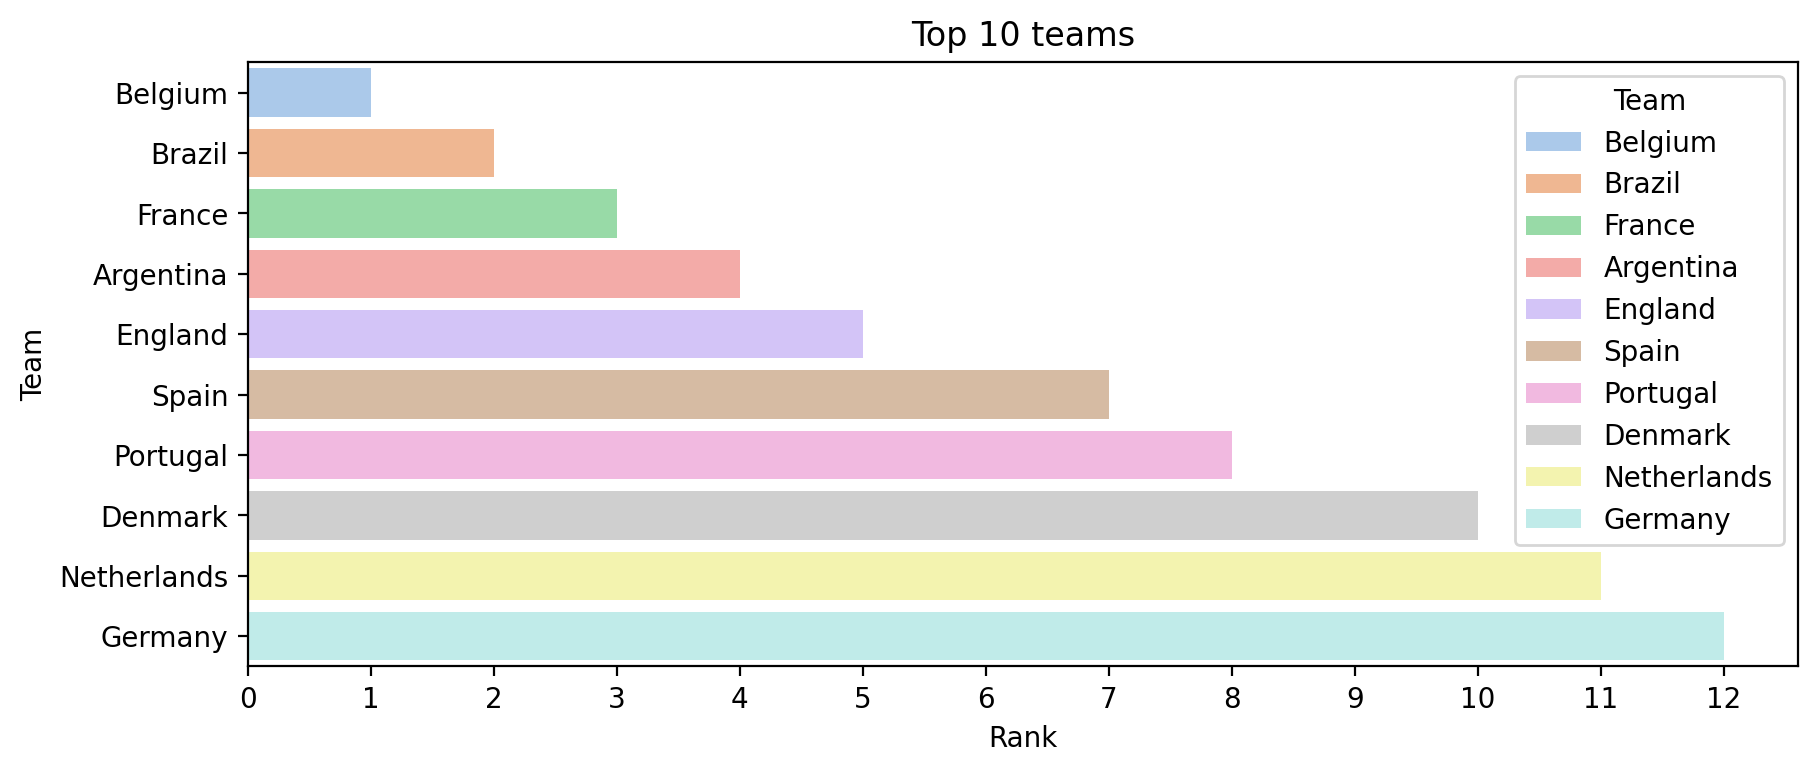

In [ ]:
# Figure Size
plt.figure(figsize=(10,4),dpi=200)
# Horizontal Bar Plot
sns.barplot(data=fifa_rank_top10,y='Team',x='Rank',palette='pastel', hue = 'Team',dodge=False)
# X Scale Size
x_ticks =[0,1,2,3,4,5,6,7,8,9,10,11,12]
x = np.array(np.arange(0, len(x_ticks),1))
plt.xticks(x, x_ticks)
plt.title("Top 10 teams");

# Show Plot
plt.show()


Best 10 offense teams

In [ ]:
#re-shape the data a bit

offense = filtered_ds_date[['date','away_team', 'away_team_mean_offense_score']]
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'Team', 'away_team_mean_offense_score' : 'Offense_score'})

offense   = away .sort_values(['Team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('Team').cumcount()+1
offense_top_10 = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(83, 'Offense_score')[0:10].reset_index()
offense_top_10

,index,date,Team,Offense_score
0,23586,2022-03-29,Argentina,89.0
1,23297,2021-11-16,France,88.3
2,23268,2021-11-15,England,88.0
3,23588,2022-03-29,Brazil,86.3
4,23186,2021-11-11,Portugal,86.0
5,23298,2021-11-16,Belgium,85.7
6,23189,2021-11-11,Spain,85.0
7,23216,2021-11-12,Poland,84.7
8,23590,2022-03-29,Uruguay,84.3
9,23236,2021-11-13,Netherlands,83.0


Data Vizualization

In [ ]:
plt.figure(figsize=(25,20),dpi=400)
# Horizontal Bar Plot
sns.barplot(data=offense_top_10,x='Offense_score',y='Team',palette='pastel', hue = 'Team',dodge=False)

plt.title("Top 10 offnse teams");
# Show Plot
plt.show()

Best 10 Midfield teams

In [ ]:
midfield = filtered_ds_date[['date','away_team','away_team_mean_midfield_score']]
away = midfield[['date','away_team','away_team_mean_midfield_score']].rename(columns={"away_team":"team","away_team_mean_midfield_score":"Midfield_score"})
midfield = away.sort_values(['date','team'],ascending=[False,True])
best_midfield_top10 = midfield.groupby('team').first().sort_values('Midfield_score',ascending=False)[0:10].reset_index()
best_midfield_top10

,team,date,Midfield_score
0,Germany,2021-11-14,87.8
1,France,2021-11-16,86.8
2,Spain,2021-11-11,86.0
3,Belgium,2021-11-16,85.5
4,Brazil,2022-03-29,85.5
5,Portugal,2021-11-11,84.5
6,Croatia,2021-11-11,84.2
7,Argentina,2022-03-29,84.0
8,England,2021-11-15,84.0
9,Netherlands,2021-11-13,83.5


Data Vizualization

In [ ]:
plt.figure(figsize=(25,20),dpi=400)
# Horizontal Bar Plot
sns.barplot(data=best_midfield_top10,x='Midfield_score',y='team',palette='pastel', hue = 'team',dodge=False)

plt.title("Top 10 Midfield teams");
# Show Plot
plt.show()

Best 10 defense teams

In [ ]:
defense = filtered_ds_date[['date', 'away_team','away_team_mean_defense_score']]
away = defense[['date','away_team','away_team_mean_defense_score']].rename(columns={"away_team":"team","away_team_mean_defense_score":"defense_score"})

defense = away.sort_values(['date','team'],ascending=[False,True])
best_defense_top10 = defense.groupby('team').first().sort_values('defense_score',ascending=False)[0:10].reset_index()
best_defense_top10

,team,date,defense_score
0,Spain,2021-11-11,86.5
1,Portugal,2021-11-11,85.2
2,Netherlands,2021-11-13,85.2
3,England,2021-11-15,85.0
4,Brazil,2022-03-29,84.8
5,France,2021-11-16,84.2
6,Germany,2021-11-14,84.0
7,Argentina,2022-03-29,82.2
8,Uruguay,2022-03-29,81.2
9,Morocco,2022-03-25,81.2


Data Visualization

In [ ]:
plt.figure(figsize=(25,20),dpi=400)
# Horizontal Bar Plot
sns.barplot(data=best_defense_top10,x='defense_score',y='team',palette='pastel', hue = 'team',dodge=False)

plt.title("Top 10 de teams");
# Show Plot
plt.show()

KeyboardInterrupt: 

Calculating percentage for 3 factors

In [ ]:
offense_top_10['Sum'] = offense_top_10['Offense_score'].sum(axis=0)
offense_top_10['Percent'] = round((offense_top_10['Offense_score']*100)/offense_top_10['Sum'],2)

best_defense_top10['Sum']=best_defense_top10['defense_score'].sum(axis=0)
best_defense_top10['Percent']= round((best_defense_top10['defense_score']*100)/best_defense_top10['Sum'],2)

best_midfield_top10['Sum']=best_midfield_top10['Midfield_score'].sum(axis=0)
best_midfield_top10['Percent']= round((best_midfield_top10['Midfield_score']*100)/best_midfield_top10['Sum'],2)

Inspecting Factors

In [ ]:
offense_top_10['Team']

0      Argentina
1         France
2        England
3         Brazil
4       Portugal
5        Belgium
6          Spain
7         Poland
8        Uruguay
9    Netherlands
Name: Team, dtype: object

In [ ]:
best_midfield_top10['team']

0        Germany
1         France
2          Spain
3        Belgium
4         Brazil
5       Portugal
6        Croatia
7      Argentina
8        England
9    Netherlands
Name: team, dtype: object

In [ ]:
best_defense_top10['team']

0          Spain
1       Portugal
2    Netherlands
3        England
4         Brazil
5         France
6        Germany
7      Argentina
8        Uruguay
9        Morocco
Name: team, dtype: object

Merging 3 factors

In [ ]:
a = best_defense_top10['team'].sort_values(ascending=False) 
b = best_midfield_top10['team'].sort_values(ascending=True)
c = offense_top_10['Team'].sort_values(ascending=True)
pd.concat([a,b,c]).sort_values(ascending=True)

0      Argentina
7      Argentina
7      Argentina
5        Belgium
3        Belgium
3         Brazil
4         Brazil
4         Brazil
6        Croatia
2        England
8        England
3        England
5         France
1         France
1         France
6        Germany
0        Germany
9        Morocco
9    Netherlands
9    Netherlands
2    Netherlands
7         Poland
4       Portugal
5       Portugal
1       Portugal
0          Spain
6          Spain
2          Spain
8        Uruguay
8        Uruguay
dtype: object

We notice that Argentina Brazil England France Netherlands Spain Portugal appeared in the 3 factors

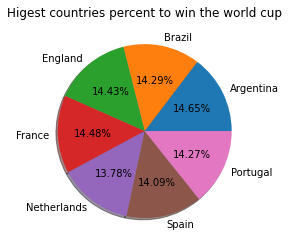

In [ ]:
Arg_off_cond = offense_top_10['Team'] == 'Argentina'
Argentina_Total_off_percent = offense_top_10[Arg_off_cond]['Percent'] + best_midfield_top10[Arg_off_cond]['Percent']+best_defense_top10[Arg_off_cond]['Percent']

Bra_off_cond = offense_top_10['Team'] == 'Brazil'
Brazil_Total_off_percent = offense_top_10[Bra_off_cond]['Percent'] + best_midfield_top10[Bra_off_cond]['Percent']+best_defense_top10[Bra_off_cond]['Percent']

Eng_off_cond = offense_top_10['Team'] == 'England'
England_Total_off_percent = offense_top_10[Eng_off_cond]['Percent'] + best_midfield_top10[Eng_off_cond]['Percent']+best_defense_top10[Eng_off_cond]['Percent']

Fra_off_cond = offense_top_10['Team'] == 'France'
France_Total_off_percent = offense_top_10[Fra_off_cond]['Percent'] + best_midfield_top10[Fra_off_cond]['Percent']+best_defense_top10[Fra_off_cond]['Percent']

Net_off_cond = offense_top_10['Team'] == 'Netherlands'
Netherlands_Total_off_percent = offense_top_10[Net_off_cond]['Percent'] + best_midfield_top10[Net_off_cond]['Percent']+best_defense_top10[Net_off_cond]['Percent']

Spa_cond = offense_top_10['Team'] == 'Spain'
Spain_Total_off_percent = offense_top_10[Spa_cond]['Percent'] + best_midfield_top10[Spa_cond]['Percent']+best_defense_top10[Spa_cond]['Percent']

Por_cond = offense_top_10['Team'] == 'Portugal'
Portugal_Total_off_percent = offense_top_10[Por_cond]['Percent'] + best_midfield_top10[Por_cond]['Percent']+best_defense_top10[Por_cond]['Percent']

Portugal_Total_off_percent
data = pd.DataFrame({'Team': ['Argentina','Brazil','England' ,'France' ,'Netherlands', 'Spain', 'Portugal'], 'Total_Percent': [Argentina_Total_off_percent,Brazil_Total_off_percent ,England_Total_off_percent,France_Total_off_percent,Netherlands_Total_off_percent,Spain_Total_off_percent ,Portugal_Total_off_percent]},index=['Argentina','Brazil','England' ,'France' ,'Netherlands', 'Spain', 'Portugal'])

#data.Total_Percent = data.Total_Percent.astype(str)
#data.sort_values('Total_Percent', ascending=False, inplace=True)
#data.plot.scatter(x="Team", y="Total_Percent", s=50);
plt.pie(data["Total_Percent"], labels = data["Team"],autopct='%0.2f%%', shadow=True)
plt.title("Higest countries percent to win the world cup")
plt.show()

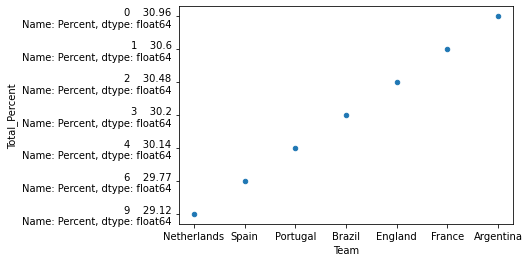

In [ ]:
data.Total_Percent = data.Total_Percent.astype(str)
data.sort_values('Total_Percent', ascending=False, inplace=True)
data.plot.scatter(x="Team", y="Total_Percent", s=20)
plt.show()

The probability of Argentina taking the World Cup based on the analysis of the data is high.

The four finalists expected to play in the final are Argentina, France, England and Brazil.